✅ Total images found: 5712
🧾 Class distribution:
 class
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64
Found 3883 validated image filenames belonging to 4 classes.
Found 686 validated image filenames belonging to 4 classes.
Found 1143 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 860ms/step - accuracy: 0.7403 - loss: 0.6604

E0000 00:00:1754371016.178899      94 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1754371016.414260      94 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1754371016.930016      94 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1754371017.189027      94 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


122/122 ━━━━━━━━━━━━━━━━━━━━ 171s 972ms/step - accuracy: 0.7413 - loss: 0.6582 - val_accuracy: 0.8163 - val_loss: 0.4208
Epoch 2/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 96s 787ms/step - accuracy: 0.9649 - loss: 0.1099 - val_accuracy: 0.7799 - val_loss: 0.5521
Epoch 3/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 97s 792ms/step - accuracy: 0.9841 - loss: 0.0592 - val_accuracy: 0.9315 - val_loss: 0.2110
Epoch 4/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 96s 786ms/step - accuracy: 0.9931 - loss: 0.0295 - val_accuracy: 0.9402 - val_loss: 0.1804
Epoch 5/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 97s 792ms/step - accuracy: 0.9902 - loss: 0.0305 - val_accuracy: 0.9708 - val_loss: 0.0829


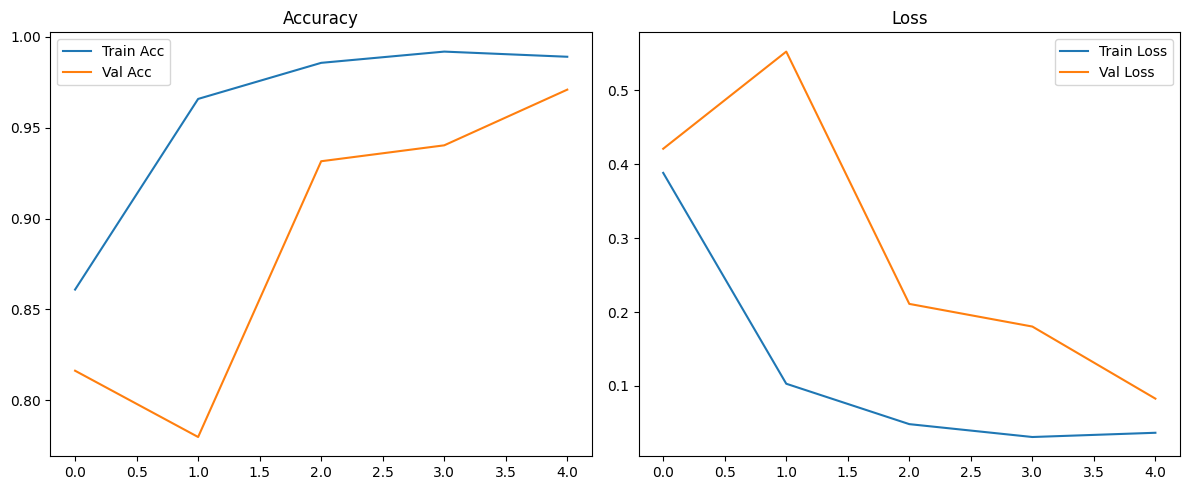

35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9851 - loss: 0.0508

E0000 00:00:1754371416.088073      95 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1754371416.326065      95 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1754371416.925544      95 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1754371417.188077      95 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 335ms/step - accuracy: 0.9851 - loss: 0.0503
✅ Test Accuracy: 0.9851
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 237ms/step

Classification Report:
               precision    recall  f1-score   support

      glioma       0.99      0.97      0.98       264
  meningioma       0.95      0.99      0.97       268
     notumor       0.99      0.99      0.99       319
   pituitary       1.00      0.99      0.99       292

    accuracy                           0.99      1143
   macro avg       0.98      0.98      0.98      1143
weighted avg       0.99      0.99      0.99      1143



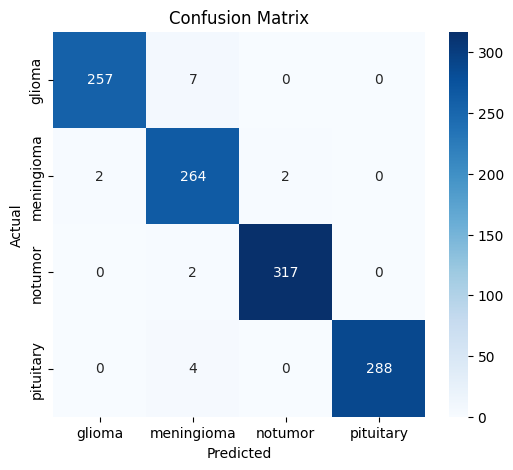

In [4]:

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input, Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ⚙️ Parameters
DATASET_PATH = "/kaggle/input/brain-tumar-mri-datset-kaggle-7000-images/Training"
IMG_SIZE = (299, 299)
BATCH_SIZE = 32
EPOCHS = 5  # Increase for better performance
NUM_CLASSES = 4

# 🧠 Step 1: Load image paths and labels
image_paths, labels = [], []
class_dirs = sorted([d for d in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, d))])
for class_dir in class_dirs:
    class_path = os.path.join(DATASET_PATH, class_dir)
    for fname in os.listdir(class_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(class_path, fname))
            labels.append(class_dir)

df = pd.DataFrame({'filename': image_paths, 'class': labels})
print(f"✅ Total images found: {len(df)}")
print("🧾 Class distribution:\n", df['class'].value_counts())

# 🧪 Step 2: Split dataset
train_df, test_df = train_test_split(df, stratify=df['class'], test_size=0.20, random_state=42)
train_df, val_df = train_test_split(train_df, stratify=train_df['class'], test_size=0.15, random_state=42)

# 🔄 Step 3: Data generators
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_dataframe(train_df, x_col='filename', y_col='class',
                                              target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                              class_mode='categorical')
val_gen = valid_datagen.flow_from_dataframe(val_df, x_col='filename', y_col='class',
                                            target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                            class_mode='categorical')
test_gen = test_datagen.flow_from_dataframe(test_df, x_col='filename', y_col='class',
                                            target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                            class_mode='categorical', shuffle=False)

# 🔧 Step 4: Build model using Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
preds = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=preds)

# ⚙️ Step 5: Compile model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 📦 Step 6: Callbacks
checkpoint = ModelCheckpoint('xception_best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
earlystop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 🏋️ Step 7: Train model
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=EPOCHS,
                    callbacks=[checkpoint, earlystop])

# 📈 Step 8: Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# 🧪 Step 9: Evaluate on test set
loss, acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {acc:.4f}")

# 🧾 Step 10: Classification report and confusion matrix
y_true = test_gen.classes
y_pred = np.argmax(model.predict(test_gen), axis=1)
class_labels = list(test_gen.class_indices.keys())

print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

